In [1]:
!pip install pandas numpy scikit-learn tensorflow
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [3]:
#Loading the dataset
DataSet = pd.read_csv(r"C:\Users\khera\OneDrive\Documents\TRISHUL\fake_news_merged_final latest.csv")

In [4]:
#Printing the columns of the dataset
for col in DataSet.columns:
    print(col)

label
full_text
digit


In [5]:
DataSet.head()

,label,full_text,digit
0,False,abortion says the annies list political group ...,0.0
1,True,energy history job accomplishments when did th...,1.0
2,True,foreign policy hillary clinton agrees with joh...,1.0
3,True,education the chicago bears have had more star...,1.0
4,True,ethics i m the only person on this stage who h...,1.0


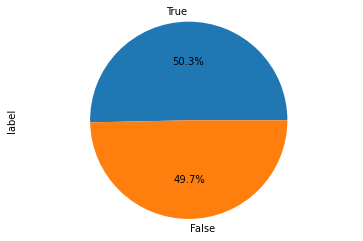

In [6]:
#Plotting the pie chart for label distribution
DataSet['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [7]:
#Preprocessing the data
texts = DataSet['full_text'].astype(str)
labels = DataSet['label']

In [8]:
#Converting labels to binary form (0 and 1)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

DataSet.head()

,label,full_text,digit
0,False,abortion says the annies list political group ...,0.0
1,True,energy history job accomplishments when did th...,1.0
2,True,foreign policy hillary clinton agrees with joh...,1.0
3,True,education the chicago bears have had more star...,1.0
4,True,ethics i m the only person on this stage who h...,1.0


In [9]:
print(DataSet['label'])

0        False
1         True
2         True
3         True
4         True
         ...  
54686     True
54687     True
54688     True
54689     True
54690     True
Name: label, Length: 54691, dtype: object


In [10]:
#Splitting the data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)

In [11]:
#Tokenizing and padding the sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_sequence_length = max(len(seq) for seq in train_sequences)

train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [12]:
#Creating the RNN model
model = Sequential()
model.add(Embedding(10000, 128, input_length=max_sequence_length))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
#Training the RNN model
history = model.fit(train_data, train_labels, epochs=5, batch_size=16, validation_data=(test_data, test_labels))

#Evaluating the RNN model
_, accuracy = model.evaluate(test_data, test_labels)
print('Accuracy:', accuracy)

Epoch 1/5
2393/2393 [==============================] - 8897s 4s/step - loss: 0.3636 - accuracy: 0.8245 - val_loss: 0.2880 - val_accuracy: 0.8637
Epoch 2/5
2393/2393 [==============================] - 6898s 3s/step - loss: 0.2232 - accuracy: 0.8935 - val_loss: 0.2110 - val_accuracy: 0.8997
Epoch 3/5
2393/2393 [==============================] - 8811s 4s/step - loss: 0.2123 - accuracy: 0.9005 - val_loss: 0.2150 - val_accuracy: 0.9034
Epoch 4/5
2393/2393 [==============================] - 7056s 3s/step - loss: 0.2177 - accuracy: 0.8985 - val_loss: 0.2821 - val_accuracy: 0.8609
Epoch 5/5
513/513 [==============================] - 252s 491ms/step - loss: 0.2340 - accuracy: 0.8904
Accuracy: 0.8904193043708801


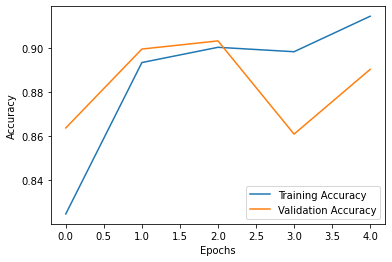

In [14]:
#Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
#Predicting on test data
predictions = model.predict(test_data)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

513/513 [==============================] - 261s 507ms/step


In [17]:
#Creating confusion matrix
import tensorflow as tf
cm = tf.math.confusion_matrix(test_labels, predicted_labels)

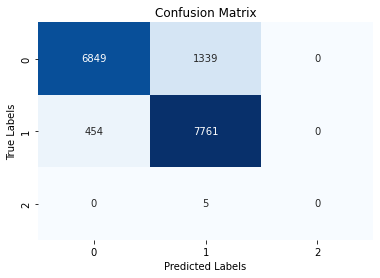

In [18]:
#Plotting confusion matrix as heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()